In [0]:
# DATASET PATHS:
## {O:'NORMAL', 1:'PNEUMONIA'} Mapping used in naming variable

BASE_PATH = '/content/drive/My Drive/chest_xray/chest_xray/'

TRAIN_PATH = BASE_PATH + 'train/'
TEST_PATH  = BASE_PATH + 'test/'
VAL_PATH   = BASE_PATH + 'val/'

TRAIN_0 = TRAIN_PATH + 'NORMAL/'
TRAIN_1 = TRAIN_PATH + 'PNEUMONIA/'

TEST_0 = TEST_PATH + 'NORMAL/'
TEST_1 = TEST_PATH + 'PNEUMONIA/'

VAL_0 = VAL_PATH + 'NORMAL/'
VAL_1 = VAL_PATH + 'PNEUMONIA/'

In [0]:
import numpy as np
import pandas as pd
import os

In [3]:
print('The number of training images belonging to class 0: ', len(os.listdir(TRAIN_0)))
print('The number of training images belonging to class 1: ', len(os.listdir(TRAIN_1)))

print('The number of validation images belonging to class 0: ', len(os.listdir(VAL_0)))
print('The number of validation images belonging to class 1: ', len(os.listdir(VAL_1)))

print('The number of test images belonging to class 0: ', len(os.listdir(TEST_0)))
print('The number of test images belonging to class 1: ', len(os.listdir(TEST_1)))

The number of training images belonging to class 0:  1342
The number of training images belonging to class 1:  3876
The number of validation images belonging to class 0:  9
The number of validation images belonging to class 1:  9
The number of test images belonging to class 0:  234
The number of test images belonging to class 1:  390


In [4]:
from keras.preprocessing import image

Using TensorFlow backend.


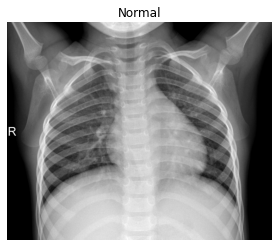

In [5]:
filenames = os.listdir(TRAIN_0)
index = np.random.randint(0, len(filenames))
IMAGE_PATH = TRAIN_0 + filenames[index]

img = image.load_img(IMAGE_PATH)
img = image.img_to_array(img)/255.

%matplotlib inline
from matplotlib import pyplot as plt

plt.imshow(img)
plt.axis('off')
plt.title('Normal')
plt.show()

In [0]:
def toDataframe(D_0, D_1):
    filenames_0 = np.array(os.listdir(D_0))
    y_0 = np.full(len(filenames_0), 'normal')

    filenames_1 = np.array(os.listdir(D_1))
    y_1 = np.full(len(filenames_1), 'pneumonia')

    filenames = np.append(filenames_0, filenames_1)
    y = np.append(y_0, y_1)

    df = pd.DataFrame({'Filenames':filenames, 'Classes':y})
    
    # Shuffling the data:
    df = df.sample(frac=1).reset_index(drop=True)
    
    return df

In [7]:
df_train = toDataframe(TRAIN_0, TRAIN_1)
df_val   = toDataframe(VAL_0, VAL_1)
df_test  = toDataframe(TEST_0, TEST_1)
display(df_train, df_val, df_test)

,Filenames,Classes
0,IM-0717-0001.jpeg,normal
1,person33_bacteria_169.jpeg,pneumonia
2,person537_bacteria_2262.jpeg,pneumonia
3,person325_bacteria_1502.jpeg,pneumonia
4,person359_bacteria_1646.jpeg,pneumonia
...,...,...
5213,person442_virus_906.jpeg,pneumonia
5214,person1676_bacteria_4441.jpeg,pneumonia
5215,person898_bacteria_2823.jpeg,pneumonia
5216,person1616_bacteria_4251.jpeg,pneumonia


,Filenames,Classes
0,NORMAL2-IM-1427-0001.jpeg,normal
1,NORMAL2-IM-1437-0001.jpeg,normal
2,NORMAL2-IM-1431-0001.jpeg,normal
3,NORMAL2-IM-1430-0001.jpeg,normal
4,person1950_bacteria_4881.jpeg,pneumonia
5,.DS_Store,normal
6,person1946_bacteria_4875.jpeg,pneumonia
7,NORMAL2-IM-1442-0001.jpeg,normal
8,NORMAL2-IM-1440-0001.jpeg,normal
9,person1947_bacteria_4876.jpeg,pneumonia


,Filenames,Classes
0,person92_bacteria_450.jpeg,pneumonia
1,person130_bacteria_627.jpeg,pneumonia
2,person1662_virus_2875.jpeg,pneumonia
3,person43_virus_92.jpeg,pneumonia
4,person122_bacteria_583.jpeg,pneumonia
...,...,...
619,person120_bacteria_570.jpeg,pneumonia
620,IM-0022-0001.jpeg,normal
621,person82_bacteria_402.jpeg,pneumonia
622,IM-0071-0001.jpeg,normal


In [0]:
from keras.applications import Xception

In [9]:
# As of now, I have kept the input shape as (150, 150, 3)
model_base = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

83689472/83683744 [==============================] - 6s 0us/step


In [10]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization

#model_base.trainable = False

model = Sequential()
model.add(model_base) # Adding the base as a layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 5, 5, 2048)        20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               26214912  
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 47,078,953
Trainable params: 47,023,401
Non-trainable params: 55,552
_____________________________________

In [11]:
from keras.preprocessing.image import ImageDataGenerator as IDG

train_datagen = IDG(
    rescale=1./255,
    rotation_range=5,
    width_shift_range=0.2,
    height_shift_range=0.2,
    #shear_range=0.2, #extra
    #zoom_range=0.2, #extra
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = IDG(rescale=1./255) # Don't augment these images

train_gen = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_gen = test_datagen.flow_from_directory(
    VAL_PATH,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

m = len(df_train)
history = model.fit_generator(
    train_gen,
    steps_per_epoch=m/32.,
    epochs=10,
    validation_data=validation_gen,
    validation_steps=1
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 91 could not be retrieved. It could be because a worker has died.
  UserWarning)


164/163 [==============================] - 4320s 26s/step - loss: 0.2828 - acc: 0.9173 - val_loss: 0.7430 - val_acc: 0.8125
Epoch 2/10
164/163 [==============================] - 2128s 13s/step - loss: 0.1183 - acc: 0.9625 - val_loss: 0.5283 - val_acc: 0.8125
Epoch 3/10
164/163 [==============================] - 2149s 13s/step - loss: 0.0926 - acc: 0.9695 - val_loss: 0.1084 - val_acc: 0.9375
Epoch 4/10
164/163 [==============================] - 2167s 13s/step - loss: 0.0668 - acc: 0.9773 - val_loss: 0.4829 - val_acc: 0.8750
Epoch 5/10
164/163 [==============================] - 2144s 13s/step - loss: 0.0727 - acc: 0.9729 - val_loss: 0.9393 - val_acc: 0.6875
Epoch 6/10
164/163 [==============================] - 2134s 13s/step - loss: 0.0424 - acc: 0.9846 - val_loss: 1.1840 - val_acc: 0.6875
Epoch 7/10
164/163 [==============================] - 2157s 13s/step - loss: 0.0406 - acc: 0.9869 - val_loss: 0.7548 - val_acc: 0.6875
Epoch 8/10
164/163 [==============================] - 2163s 13s/st

In [12]:
test_gen = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

m_test = len(df_test)
test_loss, test_acc = model.evaluate_generator(test_gen, steps=m_test/32)

Found 624 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 8 could not be retrieved. It could be because a worker has died.
  UserWarning)


In [0]:
model.save('xception_1.h5')

In [14]:
print('Test accuracy: ' ,test_acc*100,'%')

Test accuracy:  88.30128312110901 %
